In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
from torch_funcs import FullyConnectedNet, fit, test, get_mnist_loaders

In [2]:
# config
batch_size = 128
test_batch_size = 512
epochs = 10
lr = 1e-2
log_interval = 10
loss_func = F.nll_loss # FCNet return log_softmax -> with nll eq to cross entropy
torch.manual_seed(1) # ???????? tego nie chce, chce losowosc bo nie interesuje mnie wydajnosc czasowa a nie jakosciowa

use_cuda = torch.cuda.is_available()
device = torch.device("cuda"
                      if use_cuda
											else "cpu"
										)
print(f'CUDA enabled: {use_cuda}')

CUDA enabled: True


In [3]:
train_dl, val_dl, test_dl = get_mnist_loaders(batch_size, test_batch_size)

<class 'numpy.ndarray'>
float64
<class 'torch.Tensor'>
torch.float64


In [4]:
model = FullyConnectedNet().to(device)

train_history = []
acc_history = []

for epoch in range(1, epochs + 1):
	train_history.extend( fit(model, device, train_dl, loss_func, epoch, silent=False) )
	acc_history.append( test(model, device, test_dl, loss_func, silent=True) )

Train Epoch: 1 [0/48000 (0%)]	Loss: 2.332479
Train Epoch: 1 [128/48000 (0%)]	Loss: 2.292750
Train Epoch: 1 [512/48000 (1%)]	Loss: 2.269560
Train Epoch: 1 [640/48000 (1%)]	Loss: 2.289700
Train Epoch: 1 [2048/48000 (4%)]	Loss: 2.233916
Train Epoch: 1 [2176/48000 (5%)]	Loss: 2.229403
Train Epoch: 1 [2560/48000 (5%)]	Loss: 2.213598
Train Epoch: 1 [2688/48000 (6%)]	Loss: 2.225175
Train Epoch: 1 [4096/48000 (9%)]	Loss: 2.146725
Train Epoch: 1 [4224/48000 (9%)]	Loss: 2.178850
Train Epoch: 1 [4608/48000 (10%)]	Loss: 2.142611
Train Epoch: 1 [4736/48000 (10%)]	Loss: 2.142690
Train Epoch: 1 [6144/48000 (13%)]	Loss: 2.094312
Train Epoch: 1 [6272/48000 (13%)]	Loss: 2.108283
Train Epoch: 1 [6656/48000 (14%)]	Loss: 2.082893
Train Epoch: 1 [6784/48000 (14%)]	Loss: 2.104307
Train Epoch: 1 [8192/48000 (17%)]	Loss: 2.015832
Train Epoch: 1 [8320/48000 (17%)]	Loss: 2.031737
Train Epoch: 1 [8704/48000 (18%)]	Loss: 1.994086
Train Epoch: 1 [8832/48000 (18%)]	Loss: 2.053614
Train Epoch: 1 [10240/48000 (21%)]	L

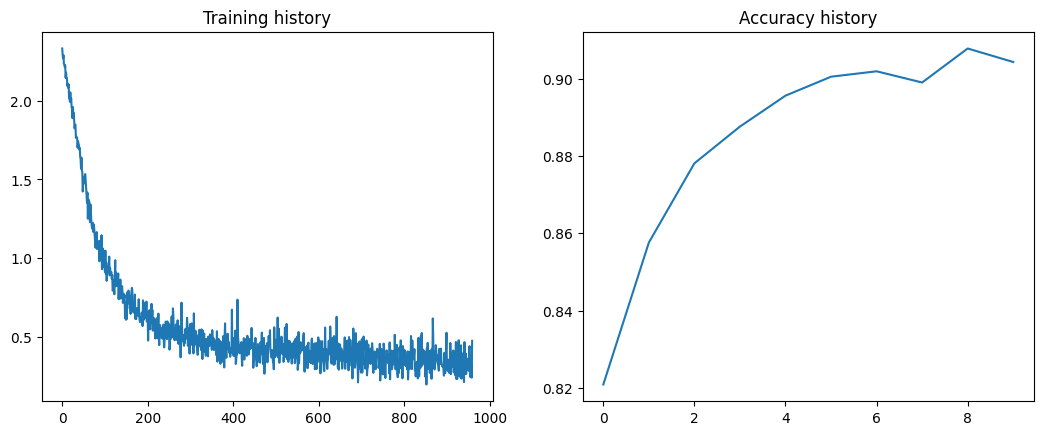

In [5]:
fig, (ax_train, ax_test) = plt.subplots(1, 2)
fig.set_size_inches(12.8, 4.8)

ax_train.plot(train_history)
ax_test.plot(acc_history)
ax_train.set_title('Training history')
ax_test.set_title('Accuracy history')

plt.show(fig)

In [6]:
import numpy as np
type(np.float64(0.4))
type(244/255)

float